In [94]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNEL = 3 
BATCH = None
image_exts = ['jpeg','jpg', 'bmp', 'png']
 

In [95]:
def read_and_decode(filename, reshape_dims):
  img = tf.io.read_file(filename)

  img = tf.image.decode_jpeg(img, channels=IMG_CHANNEL)
  img = tf.image.convert_image_dtype(img, tf.float32)

  img = tf.image.resize(img, reshape_dims)

  return img

In [96]:
directories = tf.io.gfile.glob("Train/*")
CLASS_NAMES = [os.path.basename(item) for item in directories]

print('There is %s Class Available in this Folder' % (len(CLASS_NAMES)))
index = 1
for name in CLASS_NAMES:
    print(f"{index}. {name}")
    index += 1

There is 6 Class Available in this Folder
1. Jacket
2. LongPants
3. Sandals
4. Shoes
5. ShortPants
6. TShirt


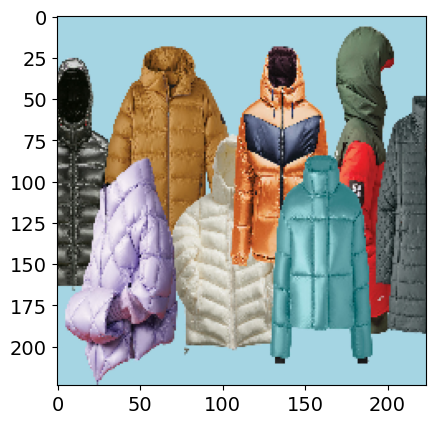

In [97]:
def show_image(filename):
    img= read_and_decode(filename, [IMG_HEIGHT,IMG_WIDTH])
    plt.imshow((img.numpy()))
    
show_image('Train/Jacket/-1x-1.jpg')

['train\\Jacket\\-1x-1.jpg', 'train\\Jacket\\04391708526-a3.jpg', 'train\\Jacket\\0584011ccd0a0ab3b4d80638bf76ee61.jpg', 'train\\Jacket\\119368-BLK00-front.jpg', 'train\\Jacket\\119598-REFP0-front.jpg', 'train\\Jacket\\1629717737612384e9619ceYDS_Product_42x.jpg', 'train\\Jacket\\1_7d097a2f-a15a-4674-93ce-a06c1af49cf1.jpg', 'train\\Jacket\\230117-puffer-jacket-bd-2x1.jpg', 'train\\Jacket\\240301-plp-jackets-m-m.jpg', 'train\\Jacket\\26_223-6013-L_2776_ca3c4dae-f3fb-469e-90e7-a2e948c2980a_1024x.jpg', 'train\\Jacket\\430102-9399-201034-2-zoom.jpg', 'train\\Jacket\\433377126_max.jpg', 'train\\Jacket\\51KjY0T1U6L._AC_UY1100_.jpg', 'train\\Jacket\\51Re8qRfcYL._AC_UY1100_.jpg', 'train\\Jacket\\65380ba9e86ef865334fcb14-men-denim-jacket-streetwear-hip-hop.jpg', 'train\\Jacket\\71oEH14QJL._AC_UY1100_.jpg', 'train\\Jacket\\784x1000_58721_b094815d736ffcf1476708893cc63a74_16300825091500Zachjacketgrey.jpg', 'train\\Jacket\\8809947343001_01_JPG_540x.jpg', 'train\\Jacket\\Adicolor_VRCT_Jacket_Green_IJ

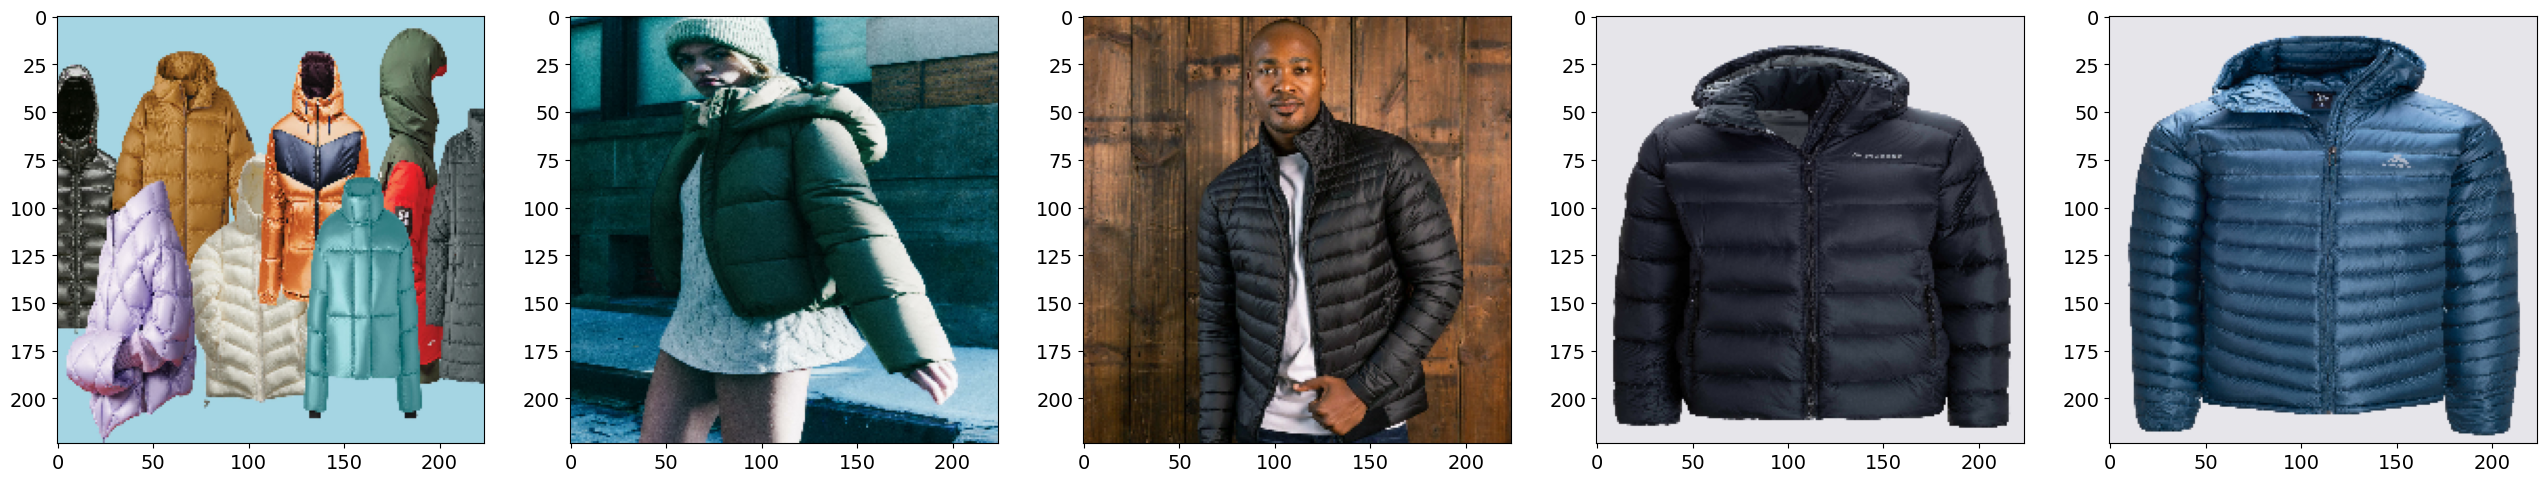

In [98]:
Jacket = tf.io.gfile.glob("train/Jacket/*.jpg")
f, ax = plt.subplots(1, 5, figsize=(32,32))
print(Jacket)
for idx, filename in enumerate(Jacket[:5]):
  print(filename)
  print(idx)
  img = read_and_decode(filename,[IMG_HEIGHT,IMG_WIDTH])
  ax[idx].imshow((img.numpy()))
  ax[idx].axis('on')

In [99]:
absolute_paths = 'Train/'
df = pd.DataFrame(columns=['path','class'])

for class_name in CLASS_NAMES:
    for ext in image_exts:
        pattern = f"{absolute_paths}{class_name}/*.{ext}"
        class_paths = tf.io.gfile.glob(pattern)
        class_paths = [path.replace('train/', '') for path in class_paths]
        paths_df = pd.DataFrame({'path': class_paths, 'class': class_name})
        df = pd.concat([df, paths_df], ignore_index=True)
        df.to_csv("train.csv",index=False,header=False)
        df.to_csv("test.csv",index=False,header=False)

print(df)

                                                  path   class
0    Train\Jacket\i-3XL_181900e6-7e99-47b3-a3ac-18e...  Jacket
1                              Train\Jacket\image.jpeg  Jacket
2                            Train\Jacket\image10.jpeg  Jacket
3                            Train\Jacket\image11.jpeg  Jacket
4                            Train\Jacket\image12.jpeg  Jacket
..                                                 ...     ...
927  Train\TShirt\sportswear-club-mens-t-shirt-ShrJ...  TShirt
928  Train\TShirt\sportswear-essential-womens-t-shi...  TShirt
929  Train\TShirt\sportswear-essentials-t-shirt-G39...  TShirt
930  Train\TShirt\standard-plain-round-neck-shirt-w...  TShirt
931  Train\TShirt\w4jlujltx2qxdcllpcg34t7qvaia9c6hp...  TShirt

[932 rows x 2 columns]


In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(df['path'],df['class'],test_size=0.20)

X_train_df = pd.DataFrame(X_train,columns=['path'])
X_test_df = pd.DataFrame(X_test,columns=['path'])

trainData = pd.concat([X_train,Y_train],axis=1)
testData = pd.concat([X_test,Y_test],axis=1)

trainData.to_csv('train.csv',index=False,header=False)
testData.to_csv('test.csv',index=False,header=False)

print (trainData)
print ('---------------------')
print (testData)

                                                  path       class
375                         Train\Sandals\image30.jpeg     Sandals
415  Train\Sandals\-1117Wx1400H-469401265-blue-MODE...     Sandals
294        Train\LongPants\71wxDhjUjGL._AC_UY1100_.jpg   LongPants
490  Train\Sandals\1_d8352d88-dee4-43eb-96ec-b9fd79...     Sandals
358                         Train\Sandals\image15.jpeg     Sandals
..                                                 ...         ...
343        Train\LongPants\STP-17M-1002-NAVY-FRONT.jpg   LongPants
126                          Train\Jacket\images30.jpg      Jacket
474      Train\Sandals\sandals-2048px-seychelles-1.jpg     Sandals
642                      Train\ShortPants\image27.jpeg  ShortPants
450  Train\Sandals\dd62ab08-5170-4957-b770-bbacecc8...     Sandals

[745 rows x 2 columns]
---------------------
                                                  path       class
892  Train\TShirt\margaret-howell-mens-y00-t-shirt-...      TShirt
526             

In [101]:
def decode_csv(csv_row):
  record_defaults = ["path", "class"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img, label

In [102]:
train_dataset = (tf.data.TextLineDataset(
    "train.csv").
    map(decode_csv)).batch(10)

eval_dataset = (tf.data.TextLineDataset(
    "test.csv").
    map(decode_csv)).batch(10)

print(train_dataset)
print(eval_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


---------------------------------------------
PREPROCESSING
---------------------------------------------

In [103]:
def plotimages():
  fig, ax = plt.subplots(1, 5, figsize=(15, 15))
  for index, (img, label) in enumerate(train_dataset.take(5)):
    # Plot the images
    plt.figure(figsize=(4, 4))
    ax[index].imshow((img.numpy()))
    ax[index].set_title(CLASS_NAMES[label.numpy()])
    ax[index].axis("on")

Tensor("ExpandDims:0", shape=(1, 224, 224, 3), dtype=float32)
Tensor("sequential_11/resizing_5/resize/ResizeBilinear:0", shape=(1, 224, 224, 3), dtype=float32)
Tensor("Squeeze:0", shape=(224, 224, 3), dtype=float32)


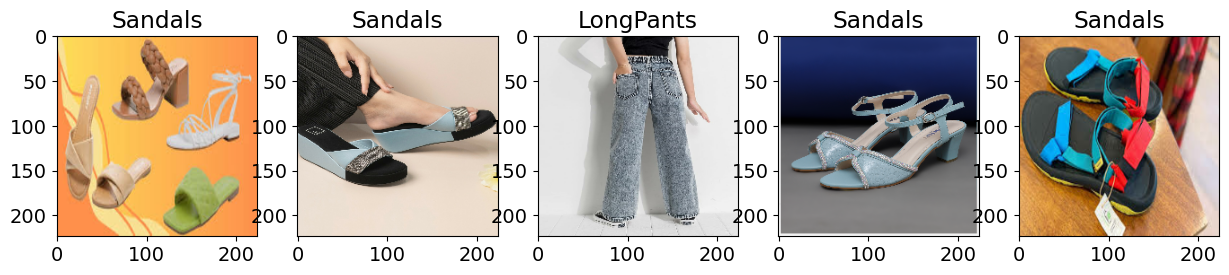

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [104]:
preproc_layers = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(
  height=IMG_HEIGHT, width=IMG_WIDTH,
  input_shape=(None, None, 3))
  ])


def apply_preproc(img, label):
  # add to a batch, call preproc, remove from batch
  x = tf.expand_dims(img, 0)
  print(x)
  x = preproc_layers(x)
  print(x)
  x = tf.squeeze(x, 0)
  print(x)
  return x, label
train_dataset = (tf.data.TextLineDataset(
    "train.csv").map(decode_csv)).map(apply_preproc)

plotimages()

In [105]:
def apply_preproc2(img, label):
    x = tf.expand_dims(img, 0)
    x = preproc_layers(x)
    x = tf.squeeze(x, 0)
    return x, label
preproc_layers = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda img:
                           tf.image.resize_with_pad(
                               img, 2*IMG_HEIGHT, 2*IMG_WIDTH),
                           input_shape=(None, None, 3)),
    tf.keras.layers.experimental.preprocessing.CenterCrop(
        height=IMG_HEIGHT, width=IMG_WIDTH)
    ])

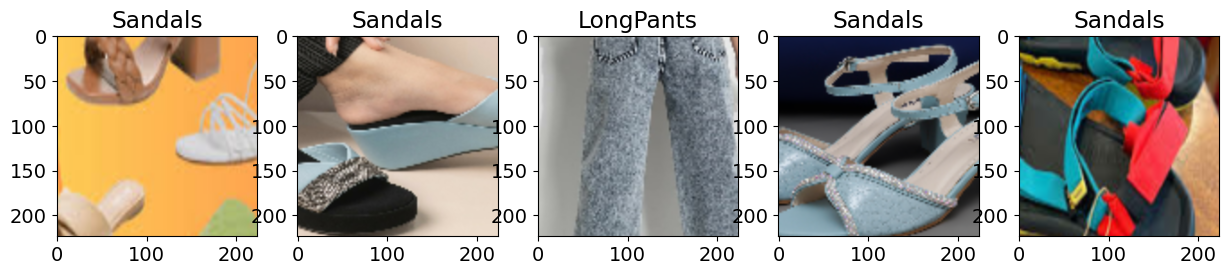

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [106]:
train_dataset = (tf.data.TextLineDataset(
    "train.csv").
    map(decode_csv).map(apply_preproc2))
plotimages()

In [107]:
print(train_dataset)
print(eval_dataset)

<MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [108]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        ax[idx].plot(history.history['val_' + metric], ls='dashed')
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)

In [117]:
import tensorflow_hub as hub
def train_and_evaluate(batch_size = 10,
                       lrate = 0.001,
                       l1 = 0.,
                       l2 = 0.,
                       num_hidden = 16):
  regularizer = tf.keras.regularizers.l1_l2(l1, l2)
  
  train_dataset = (tf.data.TextLineDataset(
    "train.csv").
    map(decode_csv).map(apply_preproc2).batch(batch_size))
  eval_dataset = (tf.data.TextLineDataset(
    "test.csv").
    map(decode_csv).map(apply_preproc2).batch(batch_size))

  layers = [
        hub.KerasLayer(
            "https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/feature-vector/1",
            input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL),
            trainable=False),
        tf.keras.layers.Dense(num_hidden,
                              kernel_regularizer=regularizer,
                              activation=tf.keras.activations.relu,
                              name='dense_hidden'),
        tf.keras.layers.Dense(len(CLASS_NAMES),
                              kernel_regularizer=regularizer,
                              activation='softmax',
                              name='cloth_prob')
    ]
  
  model = tf.keras.Sequential(layers, name='cloth_classification')
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False),
                metrics=['accuracy'])
  
  print(model.summary())
  history = model.fit(train_dataset, validation_data=eval_dataset, epochs=5)
  
  training_plot(['loss', 'accuracy'], history)
  return model

Model: "cloth_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              23561152  
                                                                 
 dense_hidden (Dense)        (None, 16)                32784     
                                                                 
 cloth_prob (Dense)          (None, 6)                 102       
                                                                 
Total params: 23,594,038
Trainable params: 32,886
Non-trainable params: 23,561,152
_________________________________________________________________
None
Epoch 1/5
75/75 [==============================] - 105s 1s/step - loss: 0.9158 - accuracy: 0.6685 - val_loss: 0.2601 - val_accuracy: 0.9305
Epoch 2/5
75/75 [==============================] - 84s 1s/step - loss: 0.2158 - accuracy: 0.9369 - val_loss: 0.1566 - val_accuracy: 0.9572
Epoch 3/5

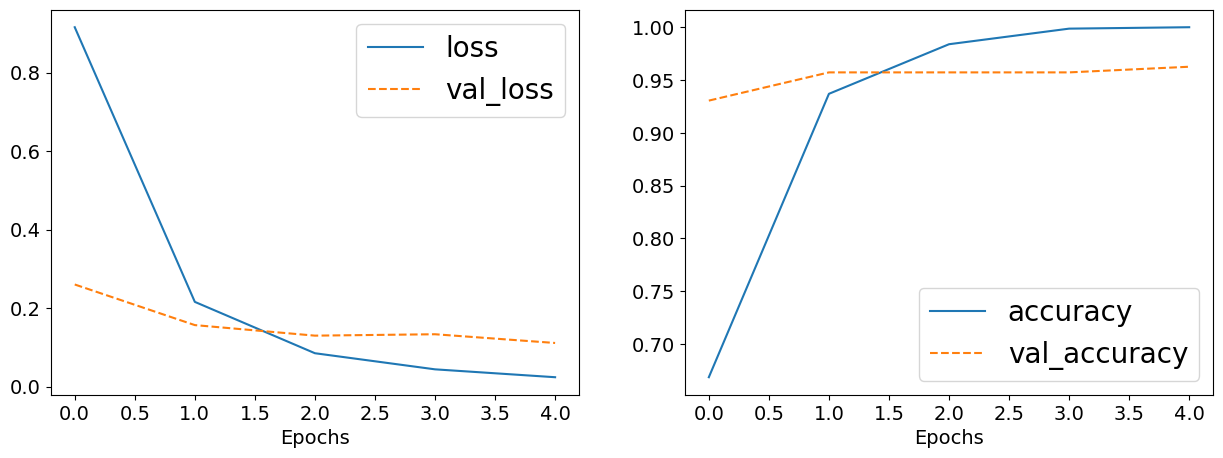

In [118]:
model = train_and_evaluate()

In [119]:
model.summary()

Model: "cloth_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              23561152  
                                                                 
 dense_hidden (Dense)        (None, 16)                32784     
                                                                 
 cloth_prob (Dense)          (None, 6)                 102       
                                                                 
Total params: 23,594,038
Trainable params: 32,886
Non-trainable params: 23,561,152
_________________________________________________________________


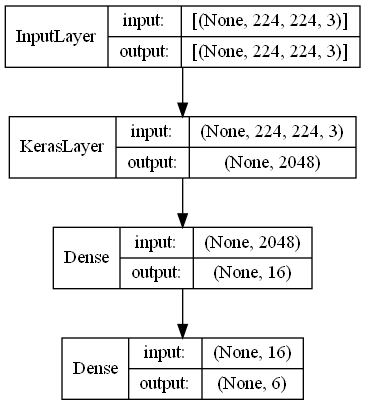

In [120]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

1/1 [==============================] - 0s 234ms/step


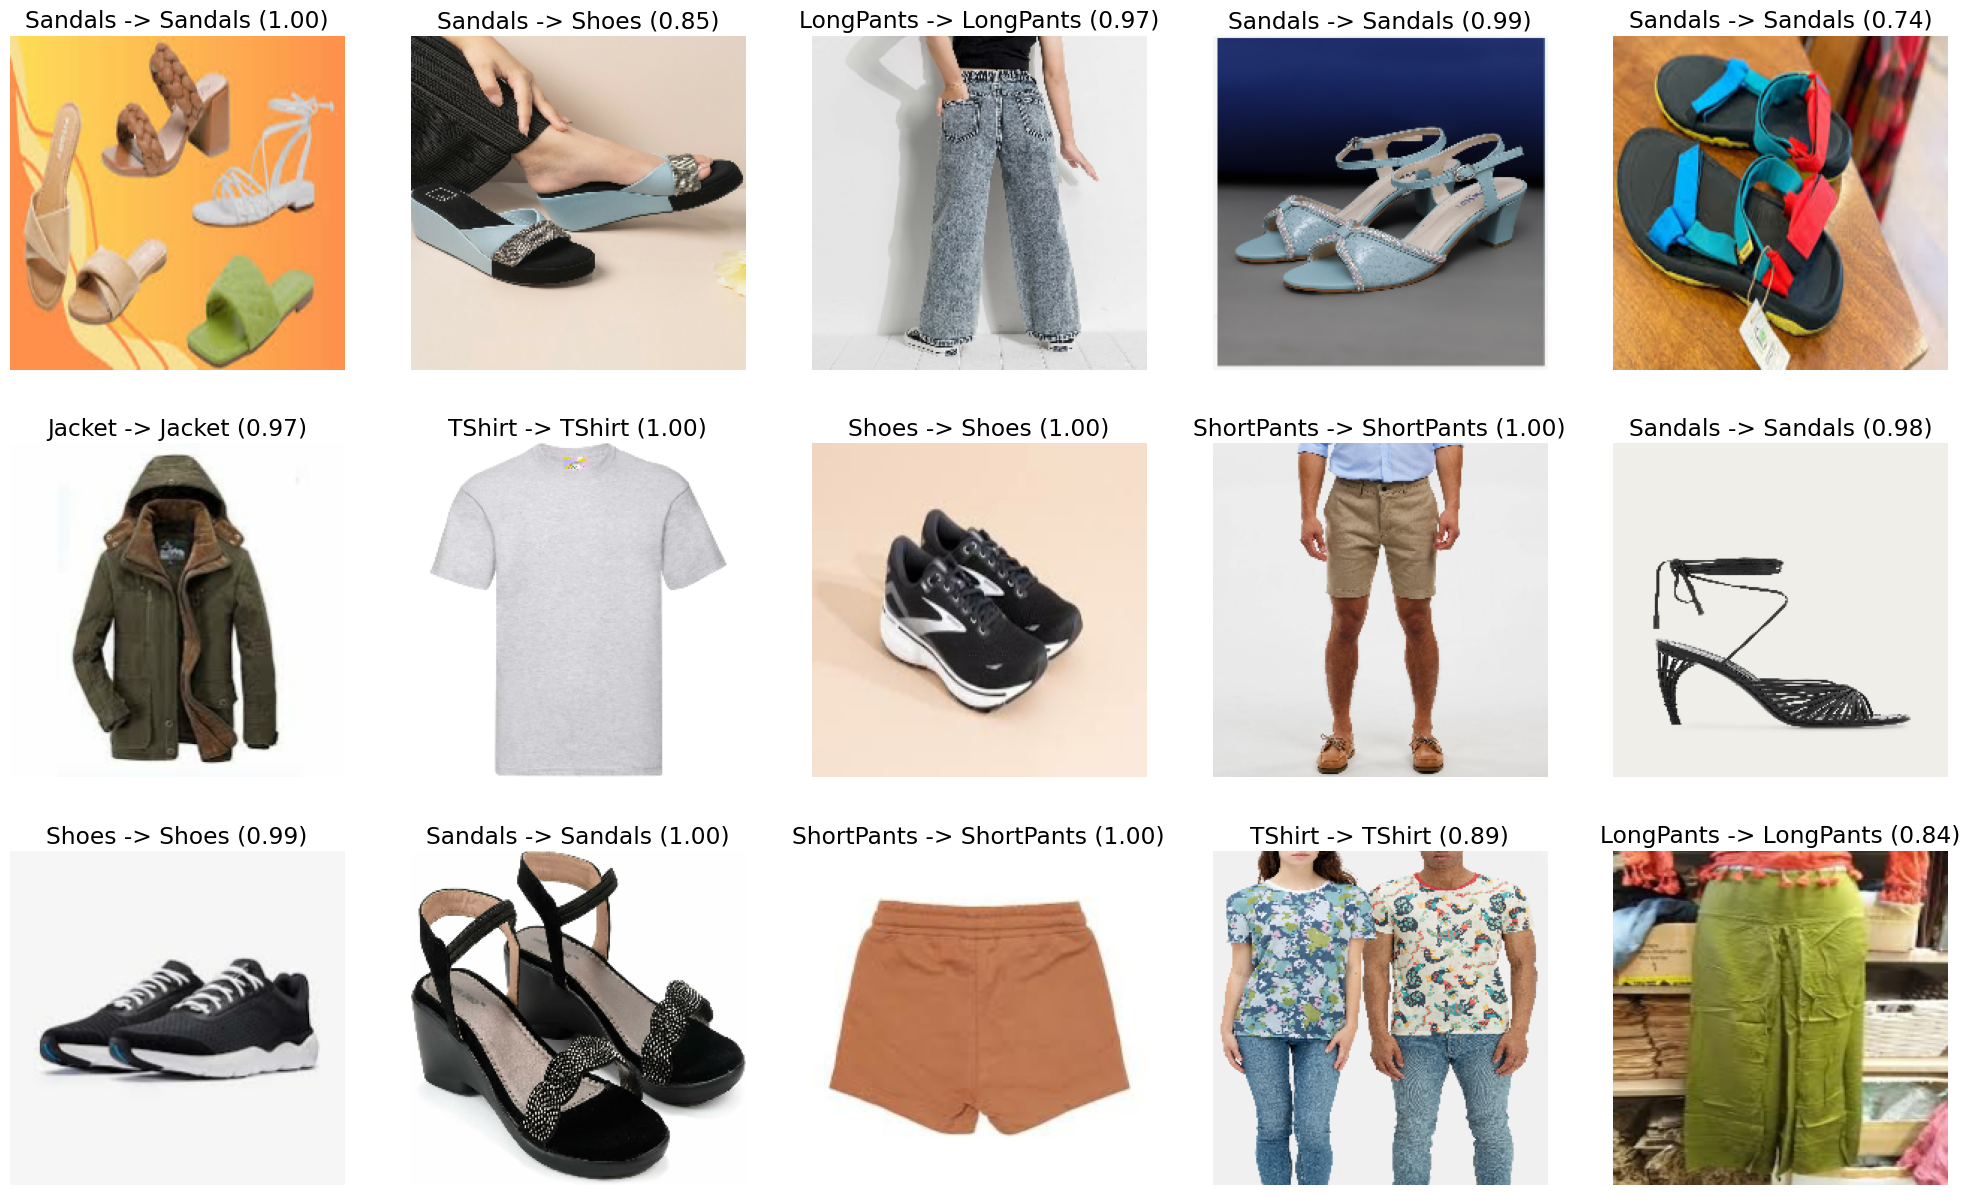

In [121]:
def plot_predictions(filename):
  plt.rcParams.update({'font.size': 14})
  f, ax = plt.subplots(3, 5, figsize=(25,15))
  dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
  for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()))
    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL])
    batch_pred = model.predict(batch_image)
    pred = batch_pred[0]
    label = CLASS_NAMES[label.numpy()]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]
    ax[idx//5, idx%5].set_title('{} -> {} ({:.2f})'.format(label, pred_label, prob))
    ax[idx//5, idx%5].axis('off')

plot_predictions("train.csv")

1/1 [==============================] - 0s 315ms/step


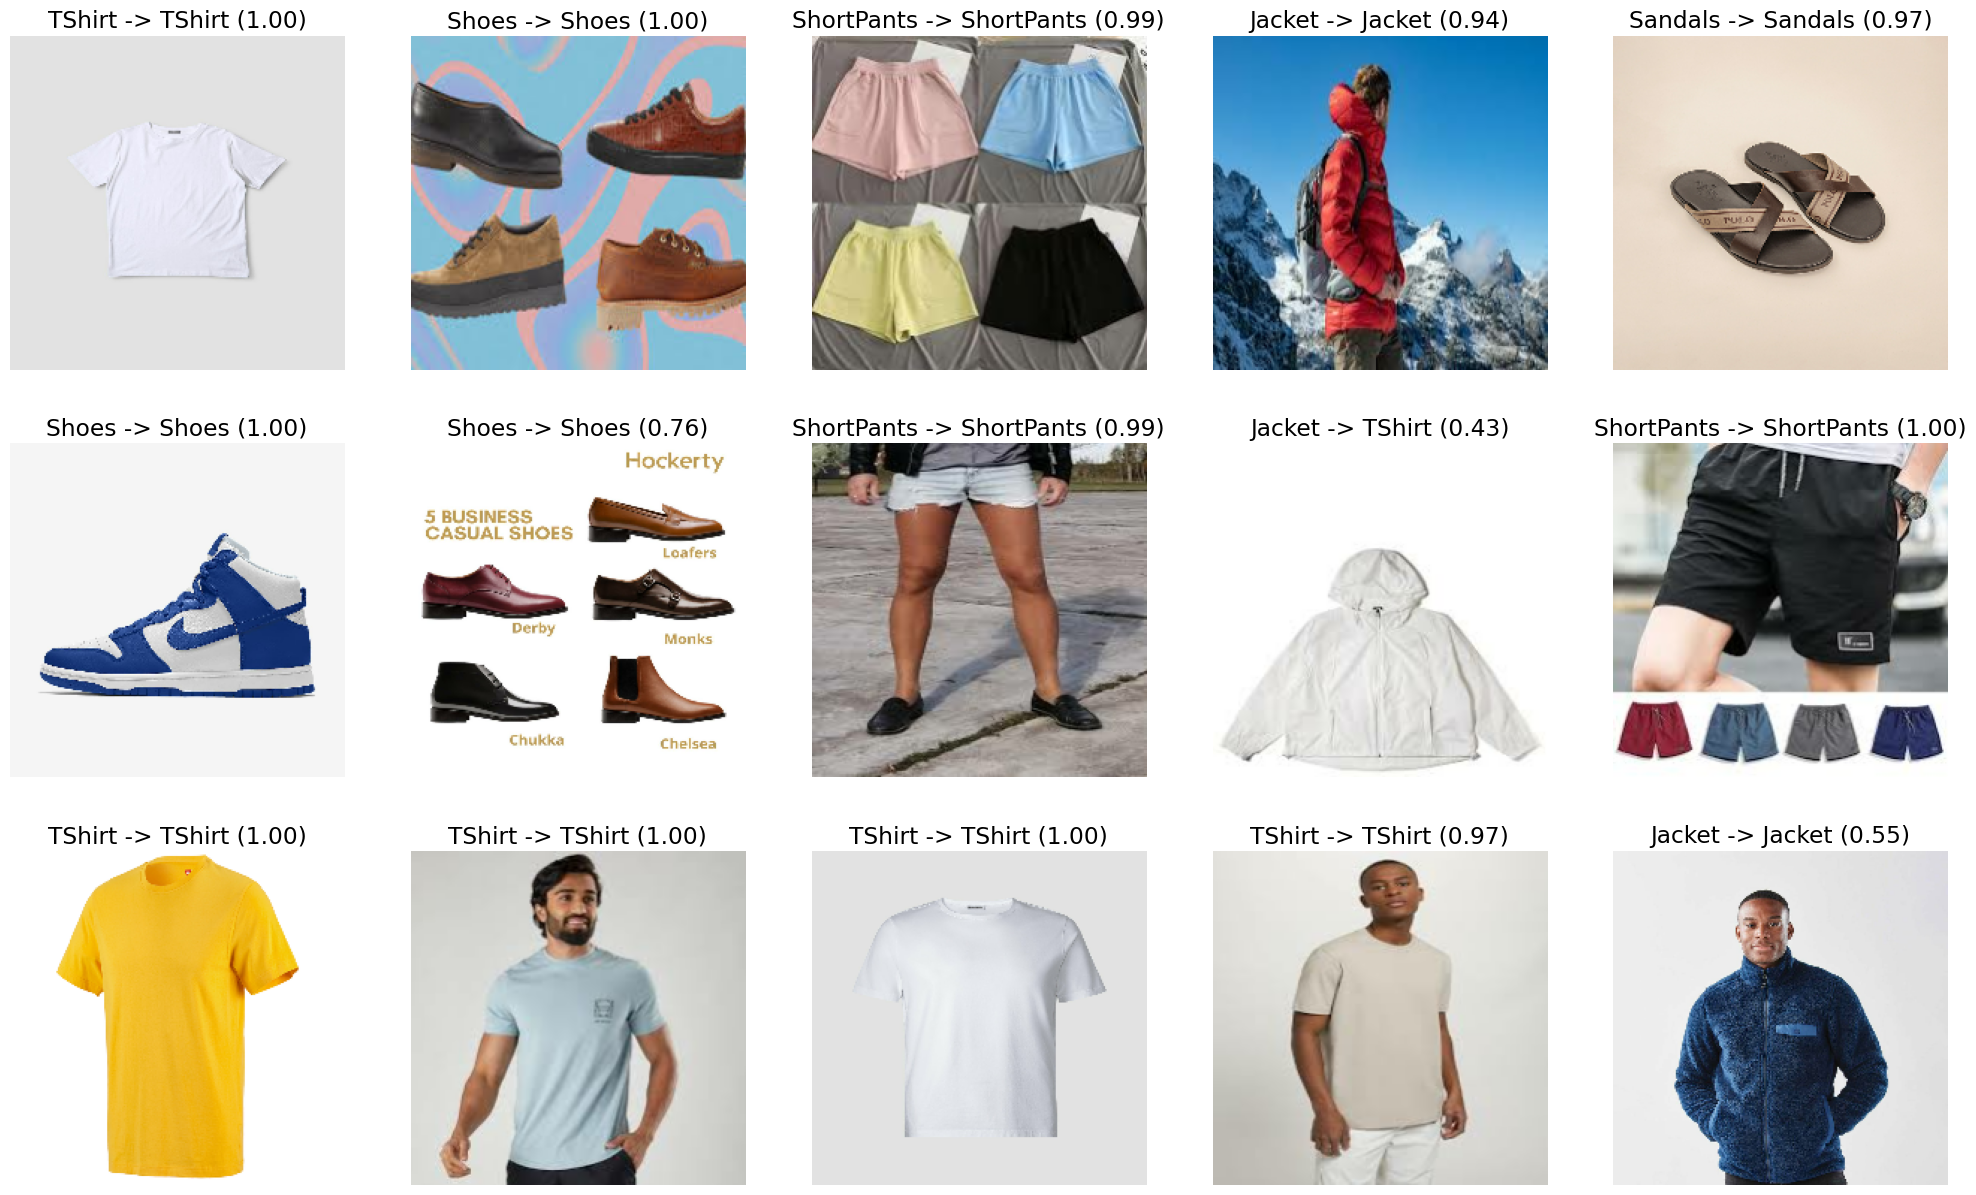

In [122]:
plot_predictions("test.csv")